# Analysis of World Economic Indicators - Corruption Index

[Data Source: World Country Data](https://www.kaggle.com/datasets/madhurpant/world-economic-data?resource=download)

This explores the world country data available from Kaggle on the link. Each of the datasets are explored including:

- corruption
- unemployment
- cost of living
- richest countries
- tourism

This notebook focusses on the corruption index and builds a linear regression model to predict the index based on a country's annual income

In [240]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [342]:
# Import data
cor = pd.read_csv('C:/Users/imoge/Downloads/archive/corruption.csv')
#un = pd.read_csv('C:/Users/imoge/Downloads/archive/unemployment.csv')
#cost = pd.read_csv('C:/Users/imoge/Downloads/archive/cost_of_living.csv')
#rich = pd.read_csv('C:/Users/imoge/Downloads/archive/richest_countries.csv')
#tour = pd.read_csv('C:/Users/imoge/Downloads/archive/tourism.csv')

In [113]:
# Shape of dataframes
print(cor.shape, un.shape, cost.shape, rich.shape, tour.shape)

(110, 3) (64, 2) (107, 4) (50, 2) (41, 5)


In [114]:
un.head()

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8


In [115]:
cost.head()

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5


In [116]:
rich.head()

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192


In [117]:
tour.head()

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3


# A) Corruption Index and Annual Income

In [118]:
cor.head()

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15


### Exploratory Data Analysis

In [119]:
cor.sort_values(by = 'annual_income', ascending = False).head()

,country,annual_income,corruption_index
6,Switzerland,90360,16
3,Norway,84090,15
8,Luxembourg,81110,19
16,Ireland,74520,26
22,United States,70430,33


In [120]:
cor.sort_values(by = 'annual_income').head()

,country,annual_income,corruption_index
99,Burundi,240,81
107,Somalia,450,87
109,South Sudan,460,89
79,Mozambique,480,74
78,Madagascar,500,74


* Switzerland has the highest annual income and Burundi the lowest

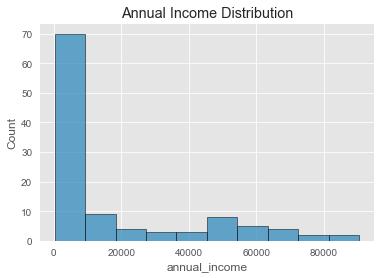

In [133]:
# Annual income distribution
sns.histplot(cor.annual_income, ec = 'k', bins = 10)
plt.title("Annual Income Distribution");

In [122]:
cor.annual_income.skew()

1.4311134518660098

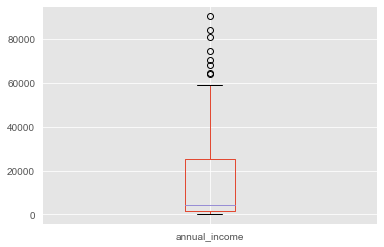

In [134]:
# Boxplot
cor.boxplot(column=['annual_income']);

In [124]:
cor.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,110.0,17195.727273,23741.147397,240.0,1470.00,4130.0,25410.0,90360.0
corruption_index,110.0,59.200000,22.170234,12.0,41.75,69.0,75.0,89.0


* Annual income is positively skewed so there are a number of outliers with high annual income
* The median income is low at just over 4000 US dollars and most countries have annual income under 20000 dollars

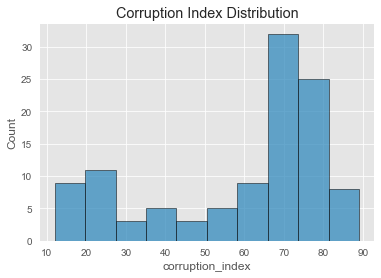

In [276]:
# Corruption Index distribution
sns.histplot(cor.corruption_index, ec = 'k', bins = 10)
plt.title("Corruption Index Distribution");

In [277]:
# Skew
cor.corruption_index.skew()

-0.8596166822213626

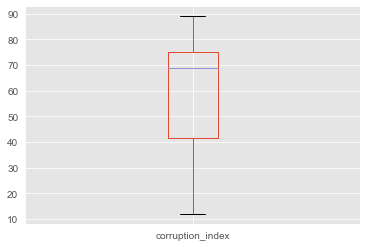

In [278]:
# Boxplot
cor.boxplot(column=['corruption_index']);

* Corruption index is slightly negatively skewed based on the skew statistic and histogram
* The boxplot shows no outliers and median corruption index of 70 

In [125]:
# Countries with the highest corruption index
high_cor = cor.sort_values(by = "corruption_index", ascending = False).head(10).set_index('country')
high_cor

,annual_income,corruption_index
country,,
South Sudan,460,89
Syria,1170,87
Somalia,450,87
Venezuela,13080,86
Yemen,670,84
Afghanistan,500,84
Libya,8430,83
Equatorial Guinea,5810,83
Turkmenistan,7220,81


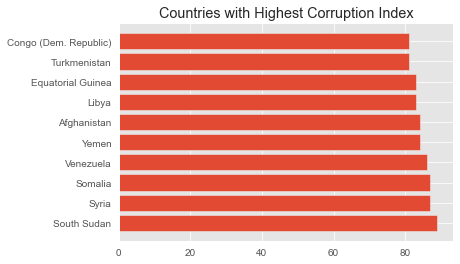

In [180]:
plt.barh(y = high_cor.index, width = high_cor.corruption_index)
plt.title("Countries with Highest Corruption Index");

* South Sudan tops the table with highest corruption values

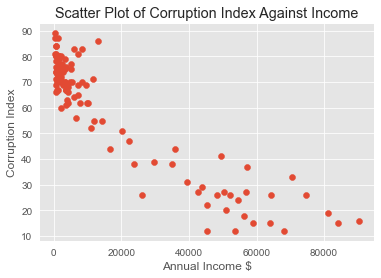

In [187]:
# Relationship between income and corruption index
plt.scatter(x = cor.annual_income, y = cor.corruption_index)
plt.title('Scatter Plot of Corruption Index Against Income')
plt.xlabel("Annual Income $")
plt.ylabel("Corruption Index");

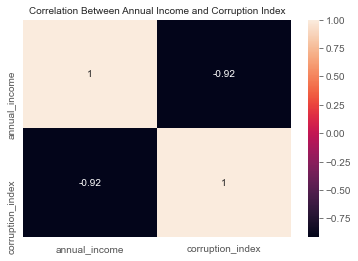

In [181]:
sns.heatmap(cor.corr(), annot = True)
plt.title("Correlation Between Annual Income and Corruption Index", fontsize = 10);

* There appears to be a strong negative linear relationship between annual income and corruption
* Lower incomes are correlated with higher corruption indices and higher incomes with lower corruption indices as we might expect
* We can try to build a predictive model based on the data but the presence of outliers might undermine the validity of any model so we need to have a look at the residuals to check for normality and constant variance.

### Build Linear Model

In [140]:
cor.shape

(110, 3)

In [146]:
# Set dependent and independent variables
X = cor.annual_income
y = cor.corruption_index

In [147]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(88,) (22,) (88,) (22,)


Note: in this case we will use a train test split as we are just seeking to do an initial exploration. Cross-validation is the gold-standard and should be used if the results are to be relied upon.

In [163]:
# Reshape data
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [154]:
# Fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [162]:
# Get the coefficient and intercept
print('Coefficient of Determination:',lm.score(X_train, y_train))
print('Coefficient:',lm.coef_, 'Intercept:',lm.intercept_)

Coefficient of Determination: 0.8359904118792435
Coefficient: [[-0.00087993]] Intercept: [74.62930282]


In [172]:
# Predict on test data
y_pred = pd.DataFrame(lm.predict(X_test))
y_pred.head()

,0
0,73.590981
1,74.180536
2,28.687949
3,73.309402
4,55.033173


In [175]:
compare_corr = pd.concat([y_pred.reset_index(drop = True), y_test.reset_index(drop = True)], axis = 1)
compare_corr.columns = ["Predicted","Actual"]
compare_corr['Predicted'] = round(compare_corr['Predicted'],0)
compare_corr.head()

,Predicted,Actual
0,74.0,73
1,74.0,66
2,29.0,26
3,73.0,72
4,55.0,47


The predicted values look pretty good

### Model Evaluation

In [275]:
# Evaluate the predicted values
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.8252752499613624


In [242]:
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  6.971110294317
Root Mean Squared Error:  8.960065492439607


* Based on the predicted values we can say that approx 83% of the variation in corruption index can be explained by the model
* Therefore 83% of the variation in corruption index is explained by annual income and some 17% residual is due to other factors
* Other factors that may explain corruption might include education levels, civil unrest, lower levels of democracy etc
* This model appears to be a good one showing a linear relationship between a country's annual income and the corruption index but we need to have a look at the residuals to see if the other assumptions of a linear model are met, i.e. residuals that are normally distributed with constant variance.

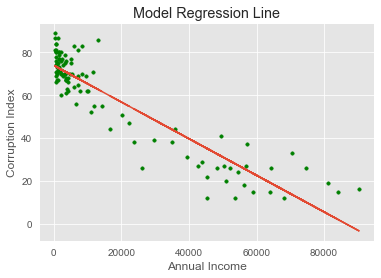

In [243]:
# Draw a plot of the data plus the linear regression line
plt.scatter(X, y,color='g', s = 12) 
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X+b)
plt.title("Model Regression Line")
plt.xlabel("Annual Income")
plt.ylabel("Corruption Index");

The regression line goes through most of the points but there might be some curve to the data indicating there may be some non-linearity

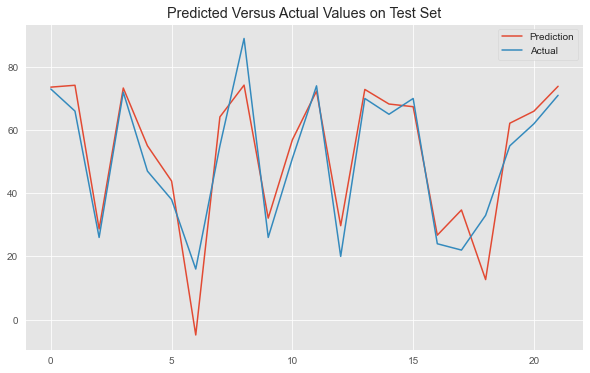

In [189]:
# Plot the predicted versus actual test values
plt.subplots(figsize=(10,6))
plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend()
plt.title("Predicted Versus Actual Values on Test Set")
plt.show()

The predicted values match fairly well to the actual test values

In [266]:
# Find the residual values and check the mean value
residuals = compare_corr['Predicted']-compare_corr['Actual']
print("Mean of Residuals: ",residuals.mean())

Mean of Residuals:  1.5


The mean is above zero

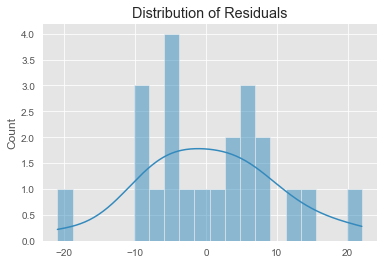

In [325]:
# Distribution of residuals
sns.histplot(x = residuals, kde = True, bins = 20)
plt.title("Distribution of Residuals");

The residuals are not normally distributed

In [264]:
# Shapiro Wilks test for normality
sp.stats.shapiro(residuals)

ShapiroResult(statistic=0.8053125739097595, pvalue=0.0006066241185180843)

We reject the null value for Shapiro Wilks with a p-value below 0.05

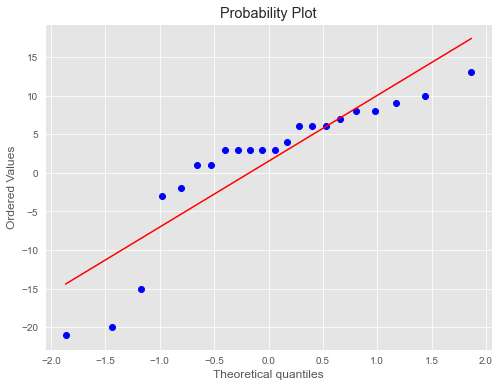

In [265]:
# Probability plot (points should fit along the line)
fig, ax = plt.subplots(figsize = (8,6))
ax = sp.stats.probplot(residuals, plot = ax)

The qq plot shows some variation around the normal line

* Check for homoscedasticity - residuals have equal or almost equal variance across the regression line. 
* Plotting residuals with predicted values to check there are no patterns

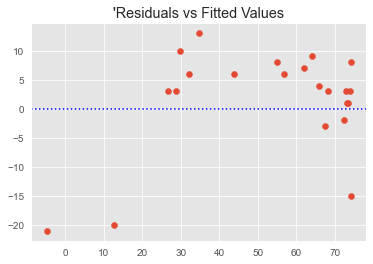

In [270]:
# Plot the Residuals against predicted values
plt.scatter(y_pred, y = residuals)
plt.axhline(y = 0, color = "blue",linestyle = ":")
plt.title("'Residuals vs Fitted Values");

* The points may be fanning out so we will try a statistical test

In [274]:
# Bartlett test - null hypothesis that samples are from populations with equal variances
from scipy.stats import bartlett
test = bartlett( X_test.annual_income,residuals)
print(test)

BartlettResult(statistic=298.94565902043865, pvalue=5.590853137815046e-67)


### Improvements to the Model

* One method would be to try a log transformation of the annual income feature which has a significant skew with outliers

In [280]:
# Set dependent and independent variables
X = np.log(cor.annual_income)
y = cor.corruption_index

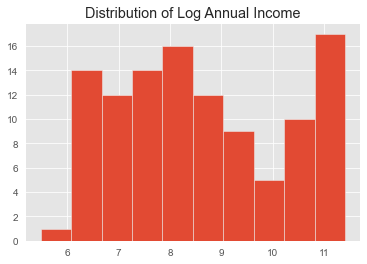

In [312]:
plt.hist(X)
plt.title("Distribution of Log Annual Income");

In [313]:
X.skew()

0.17566103580619052

In [314]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [315]:
# Reshape data
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [317]:
# Look at X values (log of annual income)
X_train.head()

,annual_income
27,10.810939
16,11.218823
84,6.272877
100,6.363028
65,6.887553


In [318]:
# Fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [337]:
# Predict on test data
y_pred = pd.DataFrame(lm.predict(X_test))

In [333]:
# Evaluate the predicted values
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.7499891645791408


The value of r2 has fallen considerably in this revised model from 0.83 to 0.75.

In [340]:
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  7.521226871289565
Root Mean Squared Error:  9.370125919551596


The root mean squared error has increased compared to the first model

In [341]:
# Get the coefficient and intercept
print('Coefficient of Determination:',lm.score(X_train, y_train))
print('Coefficient:',lm.coef_, 'Intercept:',lm.intercept_)

Coefficient of Determination: 0.7695703239107646
Coefficient: [[-12.06876725]] Intercept: [163.12854412]


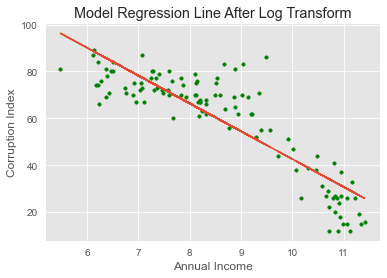

In [339]:
# Draw a plot of the data plus the linear regression line
plt.scatter(X, y,color='g', s = 12) 
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X+b)
plt.title("Model Regression Line After Log Transform")
plt.xlabel("Annual Income")
plt.ylabel("Corruption Index");

In [322]:
compare_corr = pd.concat([y_pred.reset_index(drop = True), y_test.reset_index(drop = True)], axis = 1)
compare_corr.columns = ["Predicted","Actual"]
compare_corr['Predicted'] = round(compare_corr['Predicted'],0)
compare_corr.head()

,Predicted,Actual
0,33.0,26
1,52.0,62
2,86.0,71
3,72.0,72
4,63.0,68


In [323]:
# Find the residual values and check the mean value
residuals = compare_corr['Predicted']-compare_corr['Actual']
print("Mean of Residuals: ",residuals.mean())

Mean of Residuals:  0.45454545454545453


The mean of residuals is much closer to zero

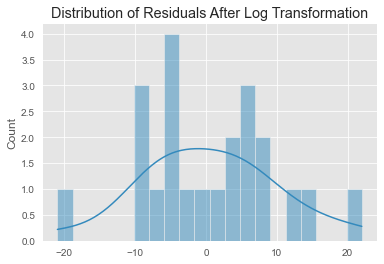

In [326]:
# Distribution of residuals
sns.histplot(x = residuals, kde = True, bins = 20)
plt.title("Distribution of Residuals After Log Transformation");

In [327]:
# Shapiro Wilks test for normality
sp.stats.shapiro(residuals)

ShapiroResult(statistic=0.9812657237052917, pvalue=0.9346292018890381)

The Shapiro Wilks test results show we fail to reject the null hypothesis of normality

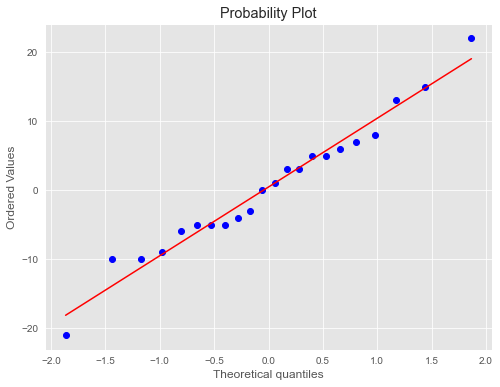

In [328]:
# Probability plot (points should fit along the line)
fig, ax = plt.subplots(figsize = (8,6))
ax = sp.stats.probplot(residuals, plot = ax)

The qq plot shows the residuals more closely fitting to the normal line

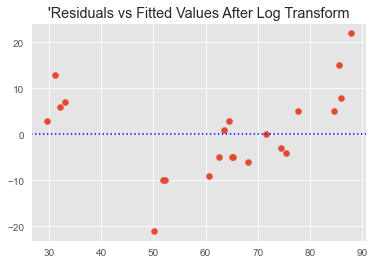

In [335]:
# Plot the Residuals against predicted values
plt.scatter(y_pred, y = residuals)
plt.axhline(y = 0, color = "blue",linestyle = ":")
plt.title("'Residuals vs Fitted Values After Log Transform");

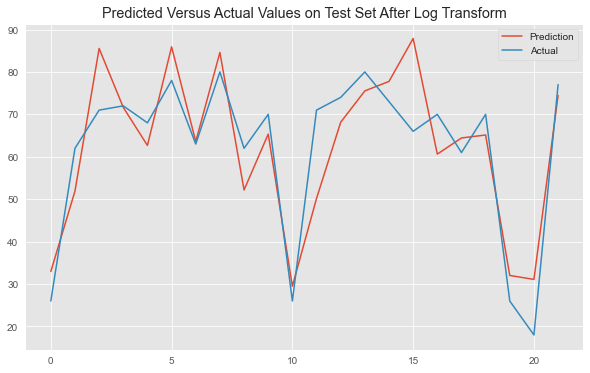

In [334]:
# Plot the predicted versus actual test values
plt.subplots(figsize=(10,6))
plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend()
plt.title("Predicted Versus Actual Values on Test Set After Log Transform")
plt.show()

* The predicted values are not matching up to the actual values as well in this model
* The r2 score fell after we performed a log transformation on the annual income to account for the non-constant variance
* Based on the predicted values we can say that approx 75% of the variation in corruption index can be explained by the model
* Therefore 75% of the variation in corruption index is explained by annual income and some 25% is due to other factors indicating our model is a little too simplistic